# Seattle Building Energy Forecasting

URL: https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking

## Notebook n°3 - Univariate Analysis

Objective: Better know each feature. Treat remaining NaN

---

## Import librairies

In [1915]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Settings

In [1916]:
sns.set(style="whitegrid")

## Import data

In [1917]:
with open("data/part2.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    data = my_unpickler.load()

In [1918]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Address,ZipCode
0,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,0,Hotel,65.0,6981428.0,249.43,No,Compliant,47.61219025,-122.33799744,405 OLIVE WAY,98101
1,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,15064,Hotel,51.0,8354235.0,263.51,No,Compliant,47.61310583,-122.33335756,724 PINE ST,98101
2,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,0,Hotel,18.0,73130656.0,2061.48,Yes,Compliant,47.61334897,-122.33769944,1900 5TH AVE,98101
3,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,0,Hotel,1.0,28229320.0,1936.34,No,Compliant,47.61421585,-122.33660889,620 STEWART ST,98101
4,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,12460,Hotel,67.0,14829099.0,507.70,No,Compliant,47.6137544,-122.3409238,401 LENORA ST,98121


In [1919]:
pd.DataFrame(data.isna().sum()).sort_values(by=0, ascending=False)

,0
ENERGYSTARScore,1604
LargestPropertyUseType,144
ZipCode,16
NumberofFloors,8
CouncilDistrictCode,0
Neighborhood,0
YearBuilt,0
NumberofBuildings,0
PropertyGFAParking,0
BuildingType,0


## Functions

In [1920]:
def cat_analysis(df, feature, x, y, figsize=(8,5), rotation="45", palette=None, order=None):
    
    data = (pd.DataFrame(df[feature].value_counts())
                .reset_index()
                .rename(columns={'index': x, feature: y}))
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=data, palette=palette, order=order);
    plt.xticks(rotation=rotation)
    plt.show()

## Building Type

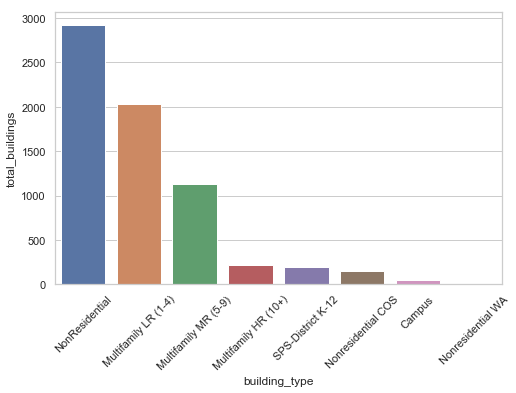

In [1921]:
cat_analysis(data, "BuildingType", "building_type", "total_buildings")

## CouncilDistrictCode

It's a categorical data, so let's change type from integar to string

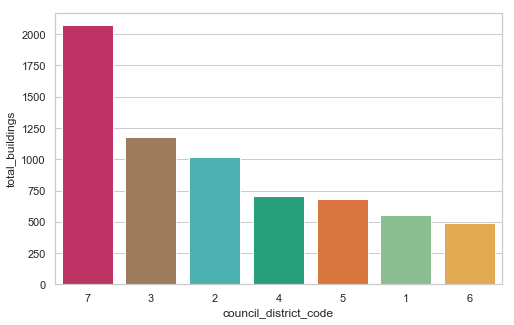

In [1922]:
colors = {
    1: "#82c88c",
    2: "#3cc0c2",
    3: "#a77c52",
    4: "#13b383",
    5: "#f36f25",
    6: "#f8af3c",
    7: "#d41c5c"
}

order = [7, 3, 2, 4, 5, 1, 6]
cat_analysis(data, "CouncilDistrictCode", "council_district_code", "total_buildings", rotation="0", palette=colors, order=order)

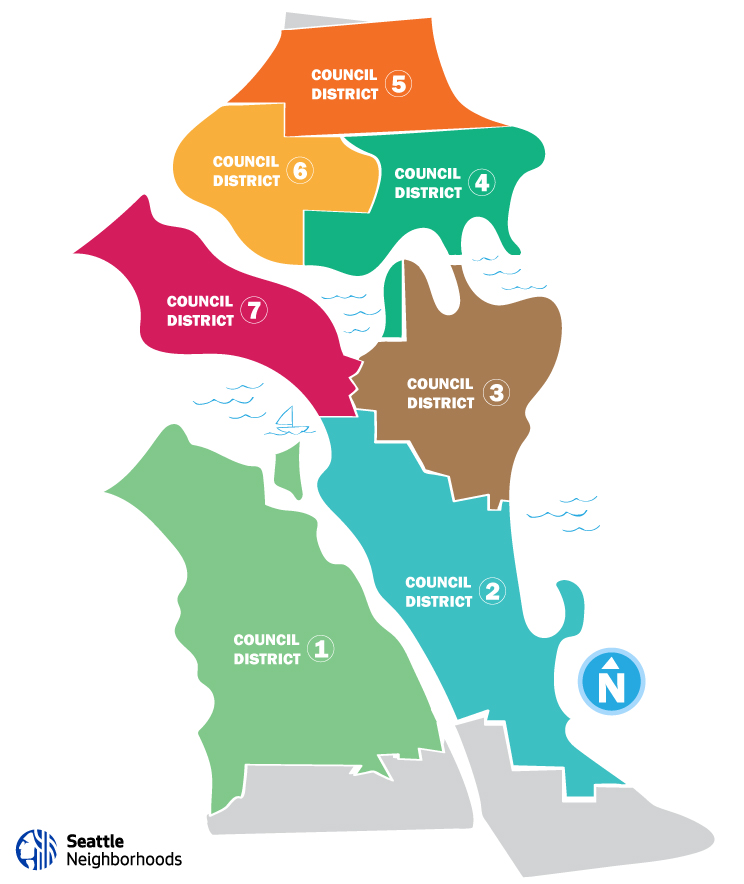

## Neighborhood

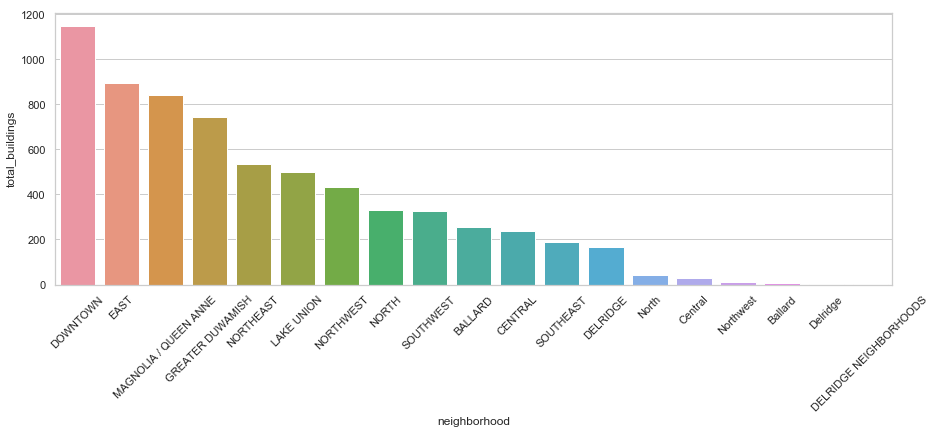

In [1923]:
cat_analysis(data, "Neighborhood", "neighborhood", "total_buildings", figsize=(15,5))

## YearBuilt

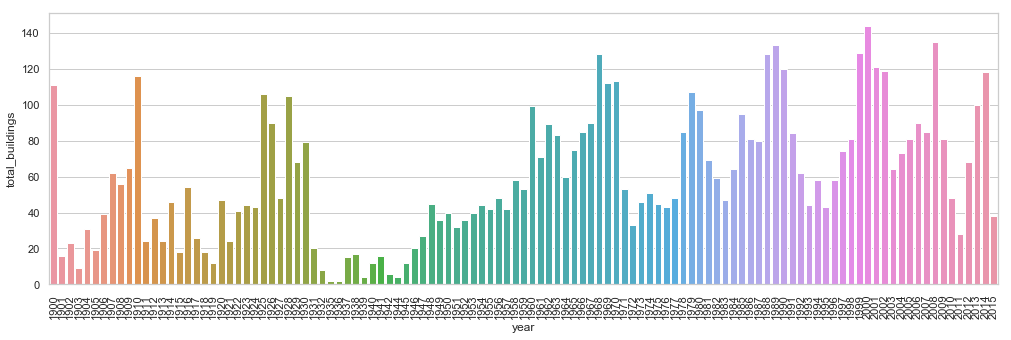

In [1924]:
cat_analysis(data, "YearBuilt", "year", "total_buildings", figsize=(17,5), rotation="90")

## LargestPropertyUseType

We have a few NaN data (144). The label "Other" already exists. So I'll atribute "Other" to the empty ones.

In [1925]:
data["LargestPropertyUseType"].fillna("Other", inplace=True)

In [1926]:
data["LargestPropertyUseType"].drop_duplicates().shape

(57,)

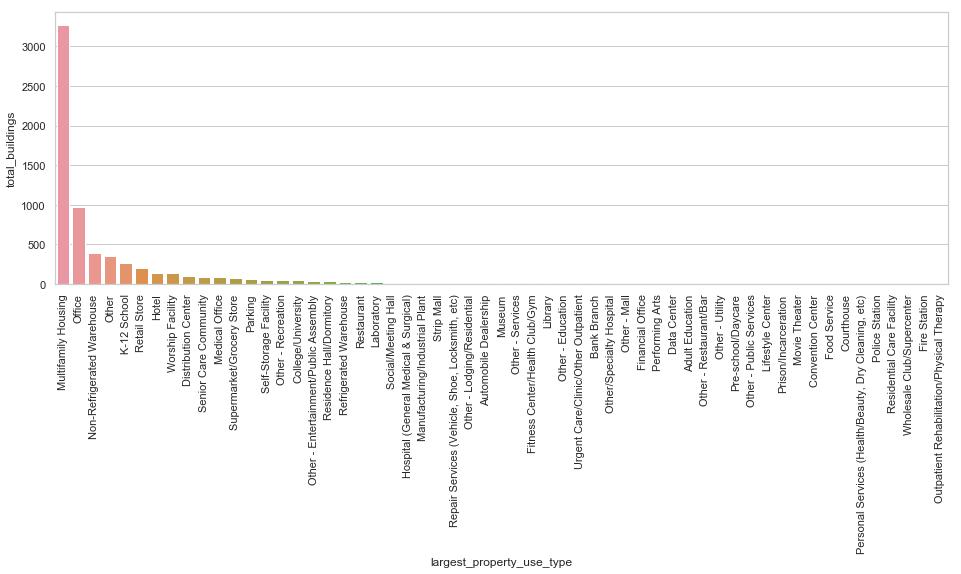

In [1927]:
cat_analysis(data, "LargestPropertyUseType", "largest_property_use_type", "total_buildings", figsize=(16,5), rotation="90")

## PrimaryPropertyType

In [1928]:
data["PrimaryPropertyType"].drop_duplicates().shape

(32,)

In [1929]:
cols = ["PrimaryPropertyType", "LargestPropertyUseType"]
mask = data["PrimaryPropertyType"] == "Other"
data[cols][mask].sample(20)

,PrimaryPropertyType,LargestPropertyUseType
1058,Other,Automobile Dealership
2995,Other,Other - Lodging/Residential
2138,Other,Other
1374,Other,"Repair Services (Vehicle, Shoe, Locksmith, etc)"
606,Other,Parking
509,Other,Lifestyle Center
1291,Other,Other
1292,Other,Other
2164,Other,Other
2575,Other,Bank Branch


## NumberofBuildings

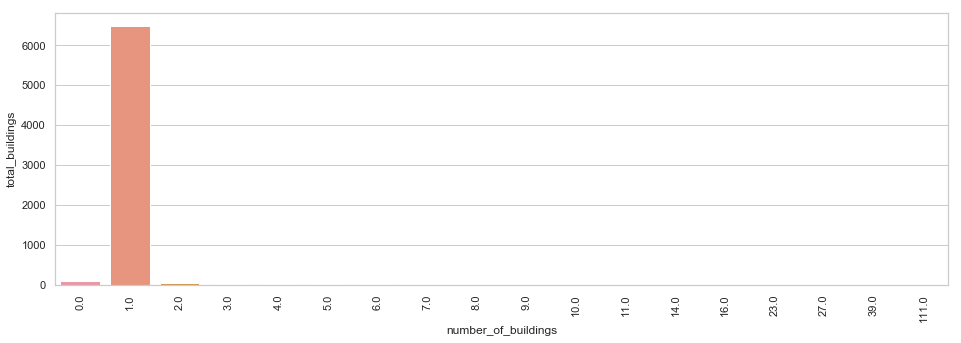

In [1930]:
cat_analysis(data, "NumberofBuildings", "number_of_buildings", "total_buildings", figsize=(16,5), rotation="90")

#### We can drop this feature, according to the bar plot.

In [1931]:
data.drop("NumberofBuildings", axis=1, inplace=True)

## NumberofFloors

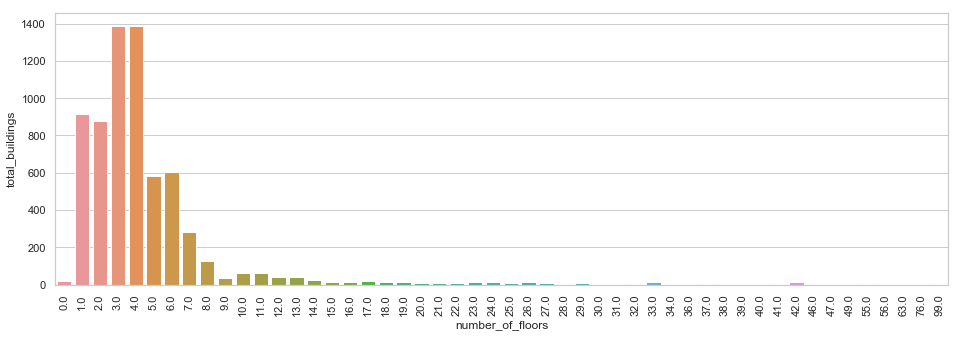

In [1932]:
cat_analysis(data, "NumberofFloors", "number_of_floors", "total_buildings", figsize=(16,5), rotation="90")

#### Let's replace 0 and NaN by 1.

In [1933]:
data["NumberofFloors"] = data["NumberofFloors"].apply(lambda x: 1 if (x == 0) else x)
data["NumberofFloors"].fillna(1, inplace=True)

#### Let's have a look on high floors

In [1934]:
data[data["NumberofFloors"] > 50]

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,PropertyGFAParking,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,DefaultData,ComplianceStatus,Latitude,Longitude,Address,ZipCode
235,2015,Nonresidential COS,Large Office,3,DOWNTOWN,1990,63.0,159600,Office,82.0,6.471565e+07,452.16,No,Compliant,47.60491077,-122.32891587,700 5TH AVE,98104
271,2015,NonResidential,Large Office,7,DOWNTOWN,1988,55.0,285000,Office,94.0,5.162555e+07,569.61,No,Compliant,47.60722258,-122.3361529,1201 3RD AVE,98101
293,2015,NonResidential,Large Office,7,DOWNTOWN,1989,56.0,389860,Office,97.0,4.834256e+07,496.99,No,Compliant,47.61001362,-122.3323936,601 UNION ST,98101
581,2015,NonResidential,Large Office,7,DOWNTOWN,1985,76.0,319400,Office,84.0,9.456009e+07,834.96,No,Compliant,47.60466039,-122.33028619,701 5TH AVE,98104
1371,2015,NonResidential,Worship Facility,2,GREATER DUWAMISH,1977,99.0,0,Worship Facility,54.0,3.182050e+05,2.22,Yes,Compliant,47.55057128,-122.302943,5801 BEACON AVE S,98108
233,2016,Nonresidential COS,Large Office,3,DOWNTOWN,1990,63.0,159600,Office,89.0,6.157618e+07,429.27,False,Compliant,47.605,-122.33,700 Fifth Avenue,98104
271,2016,NonResidential,Large Office,7,DOWNTOWN,1988,55.0,285000,Office,92.0,5.307916e+07,588.90,False,Compliant,47.6072,-122.336,1201 3rd ave,98101
292,2016,NonResidential,Large Office,7,DOWNTOWN,1989,56.0,389860,Office,97.0,4.951770e+07,525.78,False,Compliant,47.6104,-122.332,601 Union St.,98101
559,2016,NonResidential,Large Office,7,DOWNTOWN,1985,76.0,319400,Office,86.0,9.293764e+07,882.56,False,Compliant,47.6045,-122.331,701 5th Avenue,98104
1359,2016,NonResidential,Worship Facility,2,GREATER DUWAMISH,1977,99.0,0,Worship Facility,80.0,3.260012e+05,2.27,False,Compliant,47.5507,-122.303,5801 Beacon Avenue South,98108


#### Replace 99 by 1

In [1935]:
data["NumberofFloors"] = data["NumberofFloors"].apply(lambda x: 1 if (x == 99) else x)

## ENERGYSTARScore

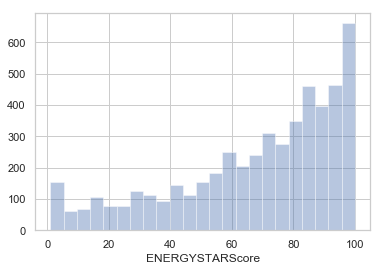

In [1936]:
sns.distplot(data["ENERGYSTARScore"].dropna(), kde=False);

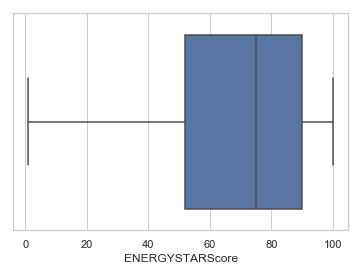

In [1937]:
sns.boxplot(data["ENERGYSTARScore"].dropna());

In [1938]:
data["ENERGYSTARScore"].dropna().describe()

count    5093.000000
mean       67.906342
std        27.012124
min         1.000000
25%        52.000000
50%        75.000000
75%        90.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

## PropertyGFAParking

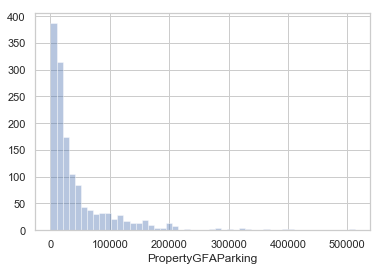

In [1939]:
sns.distplot(data[data["PropertyGFAParking"] != 0.0]["PropertyGFAParking"], kde=False)

In [1940]:
data[data["PropertyGFAParking"] == 0.0]["PropertyGFAParking"].shape

(5272,)

#### Many of buildings don't have parking area. Plus it doesn't seem to be a relevant feature. So let's drop it, in order not to overfit.

In [1941]:
data.drop("PropertyGFAParking", axis=1, inplace=True)

## Latitude

Convert fo float and then analyze

In [1942]:
data["Latitude"] = data["Latitude"].astype("float64")

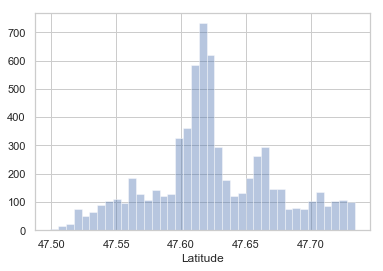

In [1943]:
ax = sns.distplot(data["Latitude"], kde=False)

## Longitude

Convert fo float and then analyze

In [1944]:
data["Longitude"] = data["Longitude"].astype("float64")

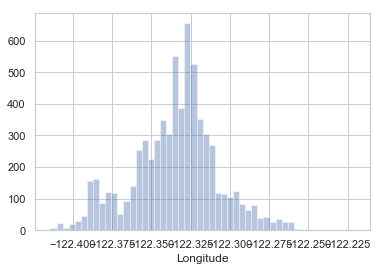

In [1945]:
ax = sns.distplot(data["Longitude"], kde=False)

## Address

In [1946]:
print(data[data["Address"].str.contains("WAY|Way", regex=True)].shape[0])
print(data[data["Address"].str.contains("ST|St | St$|Street", regex=True)].shape[0])
print(data[data["Address"].str.contains("AVE|Ave", regex=True)].shape[0])

673
1916
3945


In [1947]:
data["Address"].sample(50)

1757                805 CHERRY ST
368            13550 AURORA AVE N
2933               1020 5th Ave N
1225            300 W HARRISON ST
3056             4726 11TH AVE NE
986                  1018 1ST AVE
110                 1121 33RD AVE
163         316 NE Thornton Place
2013               1036 6TH AVE S
882                  2030 7TH AVE
1725             8356 16th AVE NW
911             2417 NW Market ST
3083                1140 18TH AVE
331                  1100 9TH AVE
1213           13240 AURORA AVE N
1207           2619 4th Ave North
1499             3512 S JUNEAU ST
150                4320 SW Myrtle
27                  1800 YALE AVE
2416               816 NE 43rd St
1232         419 QUEEN ANNE AVE N
1526            1118 NW Leary Way
2340           1017 E Harrison St
2333               417 13TH AVE E
1525              1141 NW 50th St
1941             604 20th Ave. S.
689        3614 CALIFORNIA AVE SW
1160                708 N 35th St
3222                 2121 6TH AVE
719           

## ZipCode

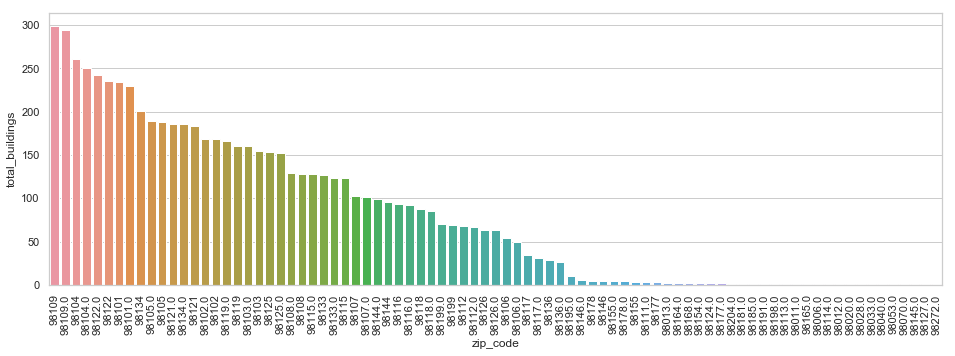

In [1948]:
cat_analysis(data, "ZipCode", "zip_code", "total_buildings", figsize=(16,5), rotation="90")

In [1949]:
data["ZipCode"].drop_duplicates().shape

(84,)

In [1950]:
np.round(data["ZipCode"].astype(float)).drop_duplicates().shape

(56,)

#### Let's convert it to string type.

But before I need to remove some ".0"

1) str -> float

2) round

3) int -> str

In [1951]:
data["ZipCode"] = np.round(data["ZipCode"].astype(float)).astype(str)

## Default Data

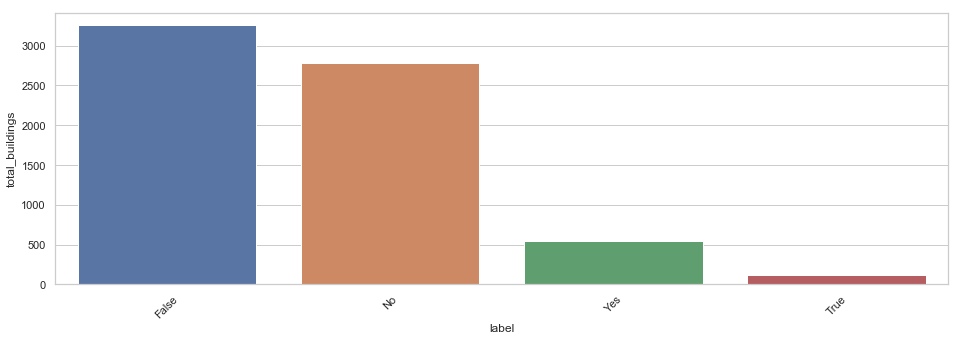

In [1952]:
cat_analysis(data, "DefaultData", "label", "total_buildings", figsize=(16,5))

#### Let's merge False / No and Yes / True

In [1953]:
def default_data(val):
    if (val == "No"):
        return False
    elif (val == "Yes"):
        return True
    else:
        return val
    
data["default_data"] = data["DefaultData"].apply(default_data).astype(str)
data.drop("DefaultData", axis=1, inplace=True)

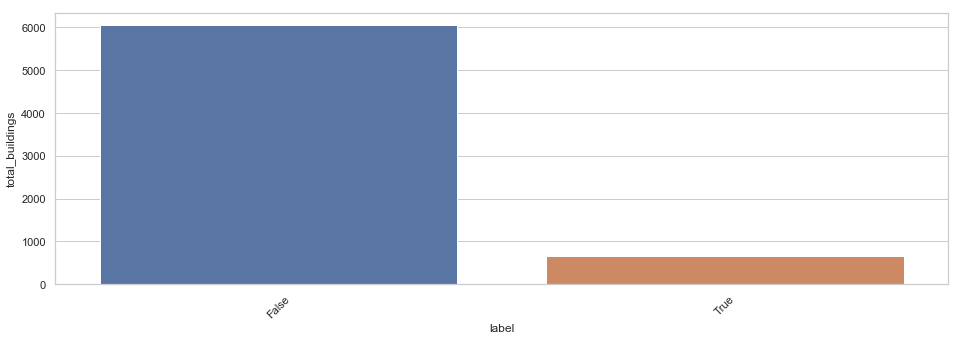

In [1954]:
cat_analysis(data, "default_data", "label", "total_buildings", figsize=(16,5))

## ComplianceStatus

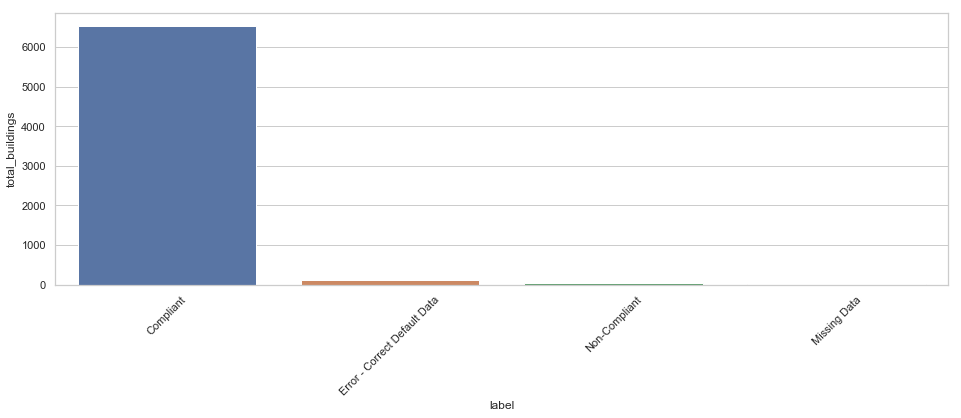

In [1955]:
cat_analysis(data, "ComplianceStatus", "label", "total_buildings", figsize=(16,5))

In [1956]:
mask = data["ComplianceStatus"] == "Non-Compliant"
data[mask].shape

(32, 17)

#### We can drop this feature (only 32 non compliants over more than 6000 observations)

In [1957]:
data.drop("ComplianceStatus", axis=1, inplace=True)

## DataYear

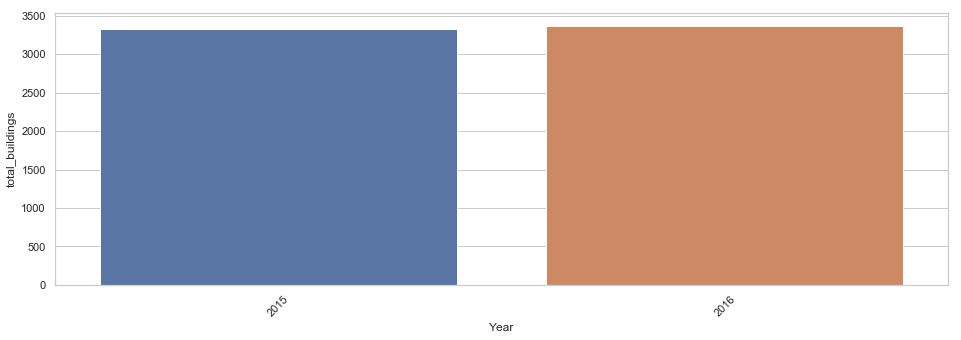

In [1958]:
cat_analysis(data, "DataYear", "Year", "total_buildings", figsize=(16,5))

## SiteEnergyUse(kBtu)

In [1959]:
target1 = "SiteEnergyUse(kBtu)"

In [1960]:
data[target1].describe()

count    6.697000e+03
mean     5.197298e+06
std      1.814157e+07
min      0.000000e+00
25%      9.206720e+05
50%      1.791716e+06
75%      4.135650e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

#### IQR * 1.5

In [1961]:
(data[target1].quantile(0.75) - data[target1].quantile(0.25)) * 1.5

4822467.75

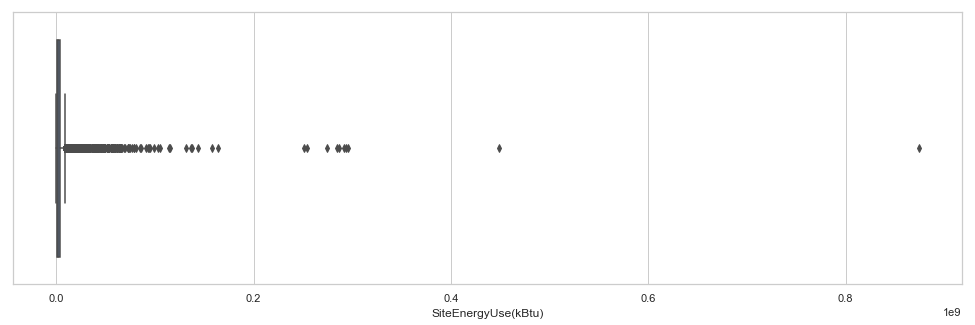

In [1962]:
fig, ax = plt.subplots(figsize=(17,5))
ax = sns.boxplot(x=data[target1])

#### Let's handle zero / negative values

In [1963]:
data[data[target1] <= 0].shape[0]

20

In [1964]:
data = data[data[target1] > 0]

#### /!\ We save a version with outliers here. Just to try our model in "real" conditions. /!\

In [1965]:
with open("data/part3-data-with-outliers.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(data)

#### Distribution

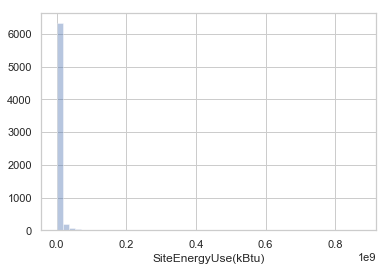

In [1966]:
ax = sns.distplot(data[target1], kde=False)

We can see that outliers disrupt the distribution. Let's try to remove some of them to enhance the distribution.

We have to find a trade-off.

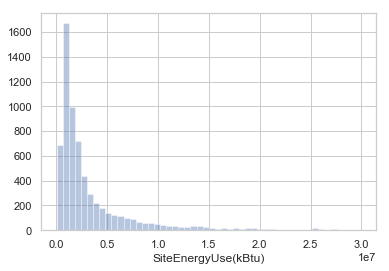

In [1967]:
max_C = 30000000
data_temp = data[data[target1] < max_C]
ax = sns.distplot(data_temp[target1], kde=False)

In [1968]:
print(data.shape[0])
print(data[data[target1] >= max_C].shape[0] / data.shape[0])
print(data[data[target1] >= max_C].shape[0])

6677
0.02561030402875543
171


#### Remove outliers

In [1969]:
target2 = "TotalGHGEmissions"
data = data[data[target1] < max_C]

## TotalGHGEmissions

In [1970]:
data[target2].describe()

count    6506.000000
mean       73.600824
std       116.949730
min        -0.800000
25%         9.112500
50%        31.495000
75%        83.057500
max      1936.340000
Name: TotalGHGEmissions, dtype: float64

### IQR * 1.5

In [1971]:
(data[target2].quantile(0.75) - data[target2].quantile(0.25)) * 1.5

110.91750000000002

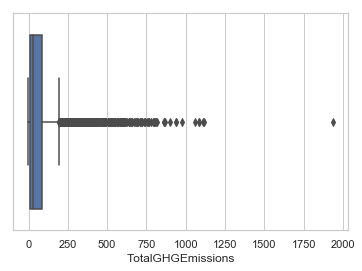

In [1972]:
ax = sns.boxplot(x=data[target2])

#### Let's handle negative values

In [1973]:
data[data[target2] < 0].shape

(1, 16)

In [1974]:
data = data[data[target2] >= 0]

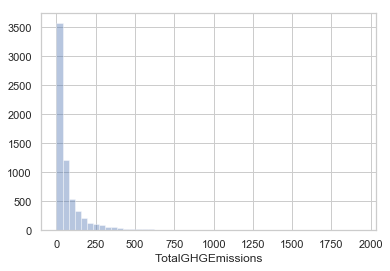

In [1975]:
ax = sns.distplot(data[target2], kde=False)

As with Electricity(kBtu), let's remove outliers

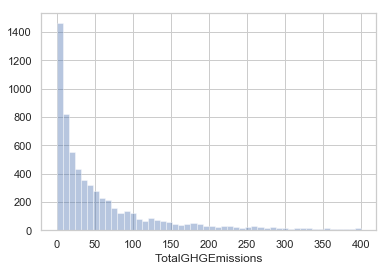

In [1976]:
max_C = 400
data_temp = data[data[target2] < max_C]
ax = sns.distplot(data_temp[target2], kde=False)

In [1977]:
print(data.shape[0])
print(data[data[target2] >= max_C].shape[0] / data.shape[0])
print(data[data[target2] >= max_C].shape[0])

6505
0.02644119907763259
172


In [1978]:
data = data[data[target2] < max_C]

## Save data

In [1979]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Address,ZipCode,default_data
0,2015,NonResidential,Hotel,7,DOWNTOWN,1927,12.0,Hotel,65.0,6981428.0,249.43,47.612190,-122.337997,405 OLIVE WAY,98101.0,False
1,2015,NonResidential,Hotel,7,DOWNTOWN,1996,11.0,Hotel,51.0,8354235.0,263.51,47.613106,-122.333358,724 PINE ST,98101.0,False
5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,2.0,Police Station,NaN,12051984.0,304.62,47.616439,-122.336764,810 VIRGINIA ST,98101.0,False
6,2015,NonResidential,Hotel,7,DOWNTOWN,1926,11.0,Hotel,25.0,6252842.0,208.46,47.614114,-122.332741,1619 9TH AVE,98101.0,False
7,2015,NonResidential,Other,7,DOWNTOWN,1926,8.0,Other - Entertainment/Public Assembly,NaN,6426022.0,199.99,47.612902,-122.331309,901 PINE ST,98101.0,False


In [1980]:
data.shape

(6333, 16)

In [1981]:
with open("data/part3.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(data)